# Word2Vec (Google) : Pré-entraînement sur un corpus en français. 

## Modèles  de Word Embeddings 

In [1]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Télécharger les données nécessaires
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


stop_words = set(stopwords.words('french'))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mathispappo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mathispappo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mathispappo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Charger les données
file_path = "../tweets_labelled.csv"
df = pd.read_csv(file_path)

### Nettoyage des données

In [4]:
# Supprimer les lien et les emojis
def remove_links(text):
    text = re.sub(r"http\S+", "", text)  # Supprimer les liens
    return text

df['cleaned_text'] = df['Texte'].astype(str).apply(remove_links)

In [5]:
# Fonction pour extraire les mentions sans modifier le reste du texte
def get_mentions(text):
    mentions = re.findall(r"@\S+", text)  # Extraire les mentions
    return mentions

# Fonction pour supprimer les mentions sans affecter les accents
def remove_mentions(text):
    # Utiliser re.sub pour supprimer uniquement les mentions
    return re.sub(r"@\S+", "", text)

# Appliquer sur les données
df['mentions'] = df['cleaned_text'].apply(get_mentions)  # Extraire les mentions
df['cleaned_text'] = df['cleaned_text'].apply(remove_mentions)  # Supprimer les mentions

In [6]:
# afficher les 5 premières lignes
print(df['cleaned_text'].head())

0    le_Parisien :\n"« Je me suis sentie humiliée »...
1    FloPortelli :\n" Ce qui est dingue c’est de po...
2    SAbdelhamid :\n"  Ce qui est dingue c’est qu’o...
3    eve_thefirst :\n"   Personne ne l'empêche de j...
4    ChipeauxMylene :\n"    C est tous à fait ça. D...
Name: cleaned_text, dtype: object


In [7]:
# afficher uniquement les mentions
def mentions(text):
    text = re.findall(r"@\S+", text)  # Trouver les mentions
    return text

# afficher les mentions
print(df['cleaned_text'].apply(mentions).sum())

[]


In [8]:
from collections import Counter
import re

# Fonction pour extraire et compter les caractères spéciaux
def special_characters_count(text):
    # Trouver tous les caractères spéciaux
    special_chars = re.findall(r"[^a-zA-Z0-9\s]", text)
    # Retourner un dictionnaire des occurrences
    return Counter(special_chars)

# Appliquer sur la colonne 'cleaned_text' et agréger les résultats
special_characters_total = df['cleaned_text'].apply(special_characters_count)

# Fusionner tous les comptes en un seul Counter
total_count = Counter()
for count in special_characters_total:
    total_count.update(count)

# Afficher le nombre de chaque caractère spécial
print(total_count)

Counter({'é': 4841, '"': 3955, '.': 3009, ':': 2460, "'": 1993, ',': 1773, '’': 1087, 'à': 991, 'è': 640, '?': 562, '_': 531, '!': 484, '-': 475, 'ê': 405, '#': 329, 'ç': 318, ')': 273, '(': 257, '️': 129, '%': 128, '/': 127, '…': 125, 'ô': 85, 'û': 85, '€': 78, '«': 66, '»': 63, '🤣': 58, '😂': 52, 'É': 49, 'â': 49, '+': 49, 'î': 47, ';': 45, 'ù': 44, 'Ç': 40, '🇷': 34, '&': 30, '🇫': 28, '🤡': 25, '✅': 25, '🤔': 24, '👇': 22, '”': 20, '🙄': 19, '👍': 18, '🚨': 18, '🇪': 18, '➡': 18, '\u200d': 17, '“': 17, 'ï': 16, '=': 16, 'À': 16, '⤵': 15, '*': 15, '😉': 15, '🔴': 15, '⚡': 15, '🇺': 14, '❌': 13, '🏻': 13, '[': 12, ']': 12, '🤦': 12, '🗣': 12, '°': 11, '✈': 11, '👉': 10, '🤷': 10, '🙏': 10, '😅': 10, '⃣': 10, '🚗': 10, '😡': 10, '🇦': 10, '⬇': 9, '😠': 9, '♀': 8, '|': 8, '🙃': 8, 'È': 8, '$': 7, '🇹': 7, 'ë': 7, 'ı': 7, '😘': 6, 'œ': 6, '❤': 6, '♂': 6, '👏': 6, '👎': 6, '🤮': 6, '🚘': 6, '🇸': 6, 'ə': 6, '‘': 5, '🇩': 5, '😤': 5, '💨': 5, '😏': 5, '🇮': 5, '☢': 5, '👻': 5, 'ü': 5, '🇿': 5, '👌': 4, '🧐': 4, '⛽': 4, '📢': 4, '

In [9]:
# Supprimer les caractères spéciaux
def remove_special_characters(text):
    text = re.sub(r"[^a-zA-ZÀ-ÿ\s]", "", text) # Supprimer les caractères spéciaux
    return text

df['cleaned_text'] = df['cleaned_text'].apply(remove_special_characters)

In [10]:
# des données manquantes
print(df.isnull().sum())

Unnamed: 0               0
Index                   48
Texte                   48
Media                 1611
Interaction             54
Sujet                   58
Données manquantes     602
A supprimer            101
cleaned_text             0
mentions                 0
dtype: int64


In [11]:
# Supprimer la colonne Media
df.drop(columns=['Media'], inplace=True)

In [12]:
# Si une ligne a un index ou sujet est manquant, supprimez-le
df.dropna(subset=['Index'], inplace=True)
df.dropna(subset=['Sujet'], inplace=True)


In [13]:
# des données manquantes
print(df.isnull().sum())

Unnamed: 0              0
Index                   0
Texte                   0
Interaction             0
Sujet                   0
Données manquantes    602
A supprimer           101
cleaned_text            0
mentions                0
dtype: int64


In [14]:
# Supprimer les mots inutiles
stop_words = set(stopwords.words('french'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(text)


df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

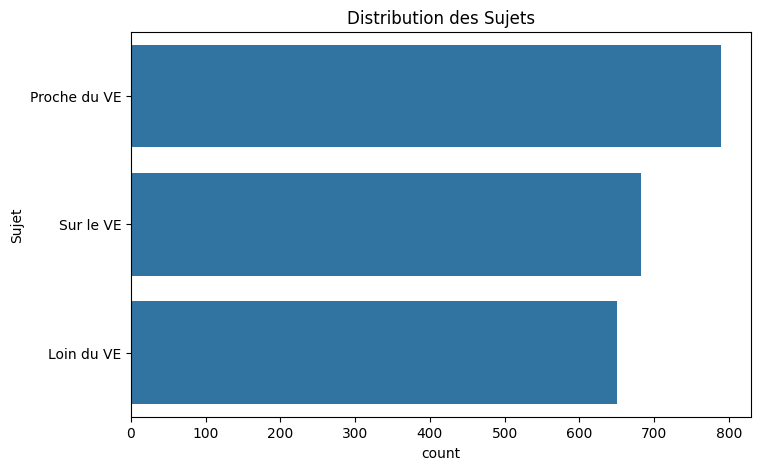

Sujet
Proche du VE    790
Sur le VE       682
Loin du VE      650
Name: count, dtype: int64

In [15]:
# Analyse des catégories (distribution des sujets)
plt.figure(figsize=(8, 5))
sns.countplot(y='Sujet', data=df, order=df['Sujet'].value_counts().index)
plt.title("Distribution des Sujets")
plt.show()

# Analyse des catégories (distribution des sujets) par un tableau
df['Sujet'].value_counts()


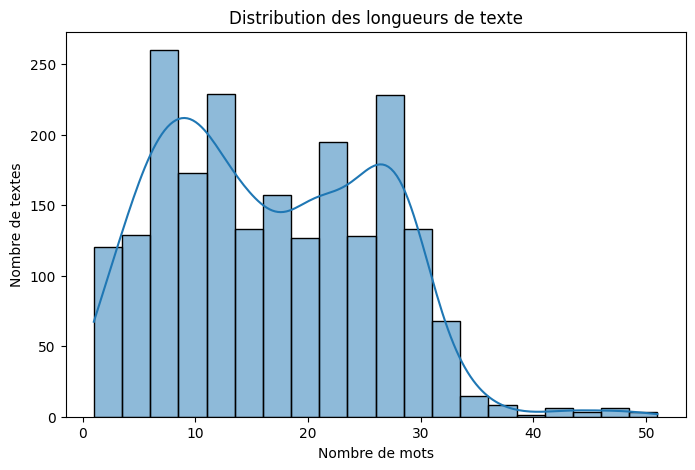

In [16]:
# Analyse des longueurs de texte
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=20, kde=True)
plt.title("Distribution des longueurs de texte")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de textes")
plt.show()

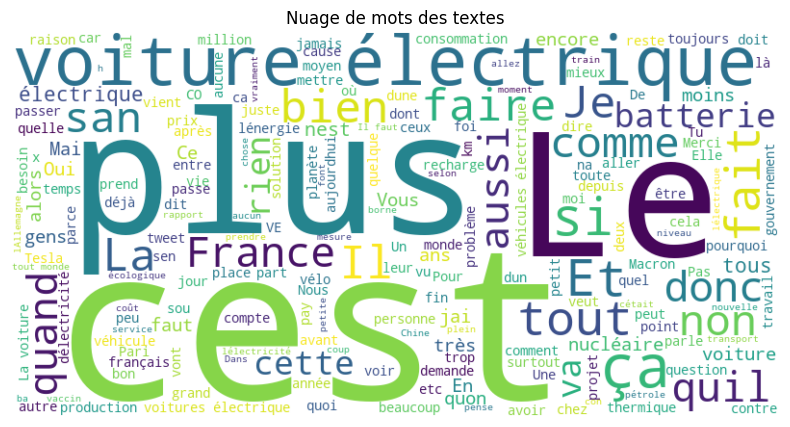

In [17]:
# Nuage de mots (WordCloud)
all_text = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des textes")
plt.show()

In [18]:
# Fréquences des mots
from collections import Counter

all_words = " ".join(df['cleaned_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

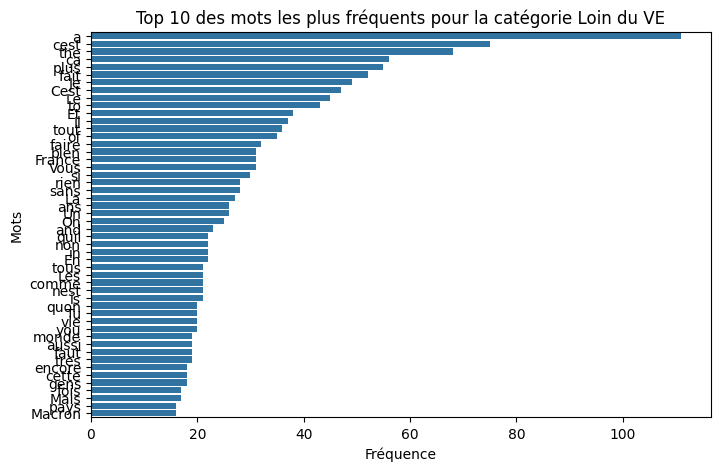

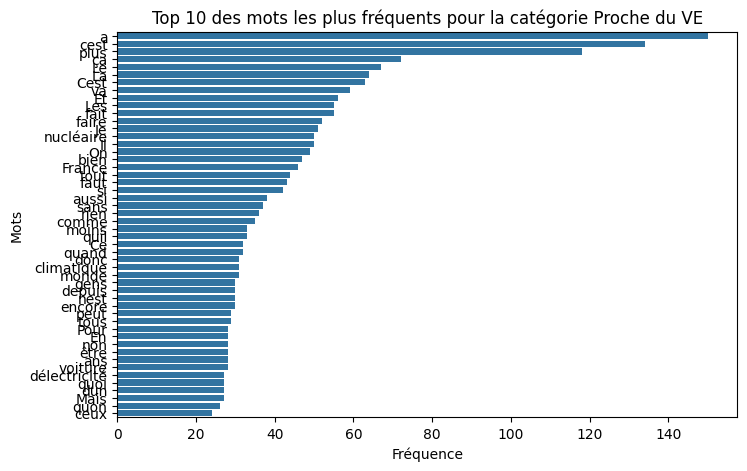

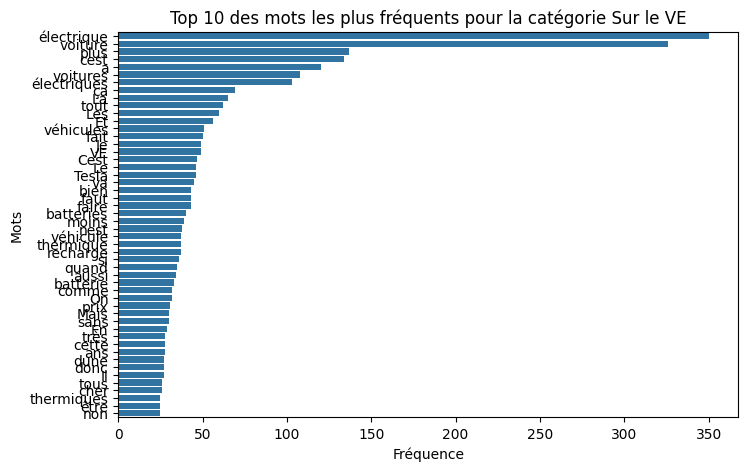

In [19]:
# Afficher les mots les plus fréquents par catégorie
categories = df['Sujet'].unique()

for category in categories:
    text = " ".join(df[df['Sujet'] == category]['cleaned_text']).split()
    word_freq = Counter(text)
    common_words = word_freq.most_common(50)

    if common_words:  # Check if common_words is not empty
        words, counts = zip(*common_words)
        plt.figure(figsize=(8, 5))
        sns.barplot(x=list(counts), y=list(words))
        plt.title(f"Top 10 des mots les plus fréquents pour la catégorie {category}")
        plt.xlabel("Fréquence")
        plt.ylabel("Mots")
        plt.show()

In [20]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

# Tokeniser les textes nettoyés
df['tokens'] = df['cleaned_text'].apply(lambda x: word_tokenize(x.lower()))

# Entraîner le modèle Word2Vec
sentences = df['tokens'].tolist()  # Obtenir toutes les phrases tokenisées
model = Word2Vec(sentences, vector_size=200, window=5, min_count=1, workers=4)

# Mots clés pour détecter les tweets sur les voitures électriques
keywords = [
    "électricité", "voiture", "voitures", "véhicules", "véhicule", 
    "tesla", "recharge", "batterie", "batteries", "thermique", 
    "thermiques", "hybride", "hybrides", "bornes", "électrique", 
    "électriques"
]

# Fonction pour calculer la similarité moyenne entre les mots d'un tweet et les mots-clés
def calculate_similarity(tweet_tokens, model, keywords):
    similarities = []
    for word in tweet_tokens:
        if word in model.wv:  # Vérifiez si le mot est dans le vocabulaire du modèle
            word_similarities = [model.wv.similarity(word, keyword) for keyword in keywords if keyword in model.wv]
            if word_similarities:
                similarities.append(max(word_similarities))
    return np.mean(similarities) if similarities else 0

# Calculer la similarité pour chaque tweet
df['similarity'] = df['tokens'].apply(lambda x: calculate_similarity(x, model, keywords))

In [21]:
# Filtrer les tweets pertinents (similarité > seuil, par exemple 0.5)
relevant_tweets = df[df['similarity'] > 0.6]

# Afficher les tweets pertinents
print(relevant_tweets[['cleaned_text', 'similarity']])

                                           cleaned_text  similarity
4     ChipeauxMylene C tous fait ça Dans sport a règ...    0.675885
8     WestRiseAgain Les autorités font tout empêcher...    0.625710
42     Remymgv Pour fois quune voiture électrique belle    0.765496
46            Splainte Le prix usage cest seul problème    0.692012
54    alezanbye Ben non copies Ni dun point vue tech...    0.602827
...                                                 ...         ...
2162  Emilien Et co quon va supprimer va être rempla...    0.682758
2163  laydgeur Je sais si cest ironique donc cas où ...    0.651533
2165                               laydgeur Je vois non    0.710873
2166  BFMTV Coupures courant comment savoir si foyer...    0.637578
2171  fredbourget Comme si cavelà prêt entendre parl...    0.610041

[515 rows x 2 columns]


In [22]:
# Random Forest Classifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Diviser les données en ensembles d'entraînement et de test
X = df['cleaned_text']
y = df['Sujet']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un vecteur TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Entraîner un classificateur RandomForest
clf = RandomForestClassifier()
clf.fit(X_train_tfidf, y_train)

# Prédire les catégories
y_pred = clf.predict(X_test_tfidf)

# Afficher les résultats (precision, recall, f1-score)
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

  Loin du VE       0.63      0.79      0.70       129
Proche du VE       0.72      0.62      0.67       154
   Sur le VE       0.93      0.85      0.89       142

    accuracy                           0.75       425
   macro avg       0.76      0.75      0.75       425
weighted avg       0.76      0.75      0.75       425

0.7482352941176471
0.7482352941176471
0.7502496798163857


In [25]:
# xgbouster classifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Encoder les labels textuels en numériques
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Entraîner un classificateur XGBoost
clf_xgb = xgb.XGBClassifier()
clf_xgb.fit(X_train_tfidf, y_train_encoded)

# Prédire les catégories
y_pred_xgb_encoded = clf_xgb.predict(X_test_tfidf)

# Décoder les prédictions pour obtenir les labels textuels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Afficher les résultats
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))


              precision    recall  f1-score   support

  Loin du VE       0.62      0.72      0.67       129
Proche du VE       0.65      0.63      0.64       154
   Sur le VE       0.91      0.81      0.86       142

    accuracy                           0.72       425
   macro avg       0.73      0.72      0.72       425
weighted avg       0.73      0.72      0.72       425

Accuracy: 0.7176470588235294
Recall: 0.7176470588235294
F1 Score: 0.7210619763511772


In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Entraîner un classificateur de régression logistique
clf_logistic = LogisticRegression(max_iter=1000)
clf_logistic.fit(X_train_tfidf, y_train)

# Prédire les catégories
y_pred_logistic = clf_logistic.predict(X_test_tfidf)

# Afficher les résultats
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_logistic, average='weighted'))

              precision    recall  f1-score   support

  Loin du VE       0.73      0.65      0.69       129
Proche du VE       0.62      0.79      0.69       154
   Sur le VE       0.93      0.75      0.83       142

    accuracy                           0.73       425
   macro avg       0.76      0.73      0.74       425
weighted avg       0.76      0.73      0.74       425

Accuracy: 0.731764705882353
Recall: 0.731764705882353
F1 Score: 0.7362198167791707


In [27]:
# Support Vector Machines
from sklearn.svm import SVC

# Entraîner un classificateur SVM
clf_svm = SVC()
clf_svm.fit(X_train_tfidf, y_train)

# Prédire les catégories
y_pred_svm = clf_svm.predict(X_test_tfidf)

# Afficher les résultats
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))

              precision    recall  f1-score   support

  Loin du VE       0.81      0.45      0.58       129
Proche du VE       0.57      0.91      0.70       154
   Sur le VE       0.95      0.73      0.82       142

    accuracy                           0.71       425
   macro avg       0.78      0.69      0.70       425
weighted avg       0.77      0.71      0.70       425

Accuracy: 0.7082352941176471
Recall: 0.7082352941176471
F1 Score: 0.7047669097238266


In [29]:
# Gradient Boosting Classifier (LightGBM)
import lightgbm as lgb

# Entraîner un classificateur LightGBM
clf_lgb = lgb.LGBMClassifier()
clf_lgb.fit(X_train_tfidf, y_train)

# Prédire les catégories
y_pred_lgb = clf_lgb.predict(X_test_tfidf)

# Afficher les résultats
print(classification_report(y_test, y_pred_lgb))
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lgb, average='weighted'))

/Users/mathispappo/Documents/Engineering-Project/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2889
[LightGBM] [Info] Number of data points in the train set: 1697, number of used features: 165
[LightGBM] [Info] Start training from score -1.180867
[LightGBM] [Info] Start training from score -0.981419
[LightGBM] [Info] Start training from score -1.145048
              precision    recall  f1-score   support

  Loin du VE       0.57      0.64      0.61       129
Proche du VE       0.60      0.62      0.61       154
   Sur le VE       0.92      0.78      0.84       142

    accuracy                           0.68       425
   macro avg       0.70      0.68      0.69       425
weighted avg       0.70      0.68      0.69       425

Accuracy: 0.6823529411764706
Recall: 0.6823529411764706
F1 Score: 0.6881949558032392


/Users/mathispappo/Documents/Engineering-Project/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [30]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Entraîner un classificateur Naive Bayes
clf_nb = MultinomialNB()
clf_nb.fit(X_train_tfidf, y_train)

# Prédire les catégories
y_pred_nb = clf_nb.predict(X_test_tfidf)

# Afficher les résultats
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))

              precision    recall  f1-score   support

  Loin du VE       0.90      0.36      0.51       129
Proche du VE       0.58      0.86      0.69       154
   Sur le VE       0.78      0.81      0.80       142

    accuracy                           0.69       425
   macro avg       0.76      0.67      0.67       425
weighted avg       0.75      0.69      0.67       425

Accuracy: 0.6894117647058824
Recall: 0.6894117647058824
F1 Score: 0.672123236172926


In [34]:
# k-Nearest Neighbors (kNN)
from sklearn.neighbors import KNeighborsClassifier

# Entraîner un classificateur kNN
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_tfidf, y_train)

# Prédire les catégories
y_pred_knn = clf_knn.predict(X_test_tfidf)

# Afficher les résultats
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))

              precision    recall  f1-score   support

  Loin du VE       0.64      0.69      0.66       129
Proche du VE       0.65      0.63      0.64       154
   Sur le VE       0.74      0.71      0.73       142

    accuracy                           0.68       425
   macro avg       0.68      0.68      0.68       425
weighted avg       0.68      0.68      0.68       425

Accuracy: 0.6752941176470588
Recall: 0.6752941176470588
F1 Score: 0.6756261434744789


In [35]:
# Multi-layer Perceptron (MLP) - Neural Network
from sklearn.neural_network import MLPClassifier

# Entraîner un classificateur MLP
clf_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
clf_mlp.fit(X_train_tfidf, y_train)

# Prédire les catégories
y_pred_mlp = clf_mlp.predict(X_test_tfidf)

# Afficher les résultats
print(classification_report(y_test, y_pred_mlp))
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Recall:", recall_score(y_test, y_pred_mlp, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_mlp, average='weighted'))

              precision    recall  f1-score   support

  Loin du VE       0.70      0.70      0.70       129
Proche du VE       0.64      0.65      0.64       154
   Sur le VE       0.76      0.75      0.76       142

    accuracy                           0.70       425
   macro avg       0.70      0.70      0.70       425
weighted avg       0.70      0.70      0.70       425

Accuracy: 0.6988235294117647
Recall: 0.6988235294117647
F1 Score: 0.6991633637074723


In [36]:
# CatBoost Classifier
from catboost import CatBoostClassifier

# Entraîner un classificateur CatBoost
clf_catboost = CatBoostClassifier(iterations=1000, verbose=0)
clf_catboost.fit(X_train_tfidf, y_train)

# Prédire les catégories
y_pred_catboost = clf_catboost.predict(X_test_tfidf)

# Afficher les résultats    
print(classification_report(y_test, y_pred_catboost))
print("Accuracy:", accuracy_score(y_test, y_pred_catboost))
print("Recall:", recall_score(y_test, y_pred_catboost, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_catboost, average='weighted'))

              precision    recall  f1-score   support

  Loin du VE       0.68      0.66      0.67       129
Proche du VE       0.63      0.73      0.68       154
   Sur le VE       0.93      0.78      0.85       142

    accuracy                           0.73       425
   macro avg       0.74      0.72      0.73       425
weighted avg       0.74      0.73      0.73       425

Accuracy: 0.7270588235294118
Recall: 0.7270588235294118
F1 Score: 0.7314418498319047


In [40]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# Entraîner un classificateur AdaBoost
clf_adaboost = AdaBoostClassifier()
clf_adaboost.fit(X_train_tfidf, y_train)

# Prédire les catégories
y_pred_adaboost = clf_adaboost.predict(X_test_tfidf)

# Afficher les résultats
print(classification_report(y_test, y_pred_adaboost))
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Recall:", recall_score(y_test, y_pred_adaboost, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_adaboost, average='weighted'))

              precision    recall  f1-score   support

  Loin du VE       0.00      0.00      0.00       129
Proche du VE       0.47      0.97      0.64       154
   Sur le VE       0.97      0.70      0.82       142

    accuracy                           0.59       425
   macro avg       0.48      0.56      0.48       425
weighted avg       0.50      0.59      0.50       425

Accuracy: 0.5858823529411765
Recall: 0.5858823529411765
F1 Score: 0.5029861496837541


In [ ]:
"""
from datasets import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Diviser les données en ensembles d'entraînement et de test
X = df['cleaned_text'].tolist()
y = df['Sujet'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Charger le tokenizer et le modèle
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained(
    'bert-base-multilingual-cased', 
    num_labels=len(df['Sujet'].unique())
)

# Fonction pour tokeniser les données
def tokenize_data(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=512)

# Préparer les données pour Hugging Face Dataset
train_data = Dataset.from_dict({'text': X_train, 'label': y_train})
test_data = Dataset.from_dict({'text': X_test, 'label': y_test})

# Tokeniser les données
train_data = train_data.map(tokenize_data, batched=True)
test_data = test_data.map(tokenize_data, batched=True)

# Définir les colonnes nécessaires pour Trainer
train_data = train_data.rename_column("label", "labels")
train_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

test_data = test_data.rename_column("label", "labels")
test_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Créer les arguments d'entraînement
training_args = TrainingArguments(
    output_dir='./results',  # Dossier pour sauvegarder les checkpoints
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir='./logs',  # Dossier pour les fichiers de logs
    logging_steps=10,
    evaluation_strategy='epoch',
)

# Créer un objet Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
)

# Entraîner le modèle
trainer.train()

# Évaluer le modèle
predictions = trainer.predict(test_data)
y_pred = np.argmax(predictions.predictions, axis=1)

# Afficher les résultats
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
"""

/Users/mathispappo/Documents/Engineering-Project/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Map: 100%|██████████| 425/425 [00:00<00:00, 1636.12 examples/s]
/Users/mathispappo/Documents/Engineering-Project/venv/lib/python3.12/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
  0%|          | 0/639 [00:00<?, ?it/s]